In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/jasonzhi/2019spring/DS 502/Project/us-education-datasets-unification-project')
us_education = pd.read_csv("states_all_extended.csv")
print(us_education.shape)

(498, 193)


In [3]:
pwd

'/Users/jasonzhi/2019spring/DS 502/Project/us-education-datasets-unification-project'

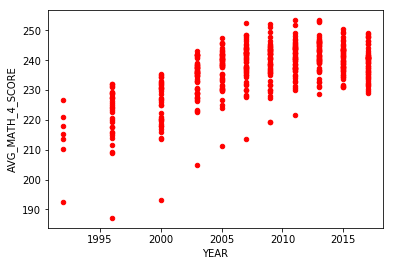

In [4]:
us_education.plot(kind='scatter',x='YEAR',y='AVG_MATH_4_SCORE', color='red')

In [5]:
print(us_education.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Columns: 193 entries, PRIMARY_KEY to AVG_READING_8_SCORE
dtypes: float64(190), int64(1), object(2)
memory usage: 751.0+ KB
None


In [6]:
us_education.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_TRF,GRADES_8_TRF,GRADES_12_TRF,GRADES_1_8_TRF,GRADES_9_12_TRF,GRADES_ALL_TRF,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.859713
1,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,215.253932,265.366278,206.212716,262.169895
2,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,210.206028,256.312090,208.634458,264.619665
3,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,NaN,NaN,NaN,NaN,NaN,NaN,221.023429,272.398433,213.480890,266.419687
4,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,NaN,NaN,NaN,NaN,NaN,NaN,226.798480,273.739345,222.417599,264.713904


In [7]:
us_education['YEAR'].unique()

array([1992, 1996, 2000, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017])

In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(us_education)

Your selected dataframe has 193 columns.
There are 189 columns that have missing values.


,Missing Values,% of Total Values
GRADES_PK_HPF,338,67.9
GRADES_ALL_HPM,338,67.9
GRADES_ALL_HPF,338,67.9
GRADES_PK_HPM,338,67.9
GRADES_PK_HP,338,67.9
GRADES_ALL_HP,338,67.9
GRADES_ALL_TRM,337,67.7
GRADES_PK_TRM,337,67.7
GRADES_PK_TR,337,67.7
GRADES_ALL_TR,337,67.7


In [10]:
us_new = pd.get_dummies(us_education, columns = ["YEAR", "STATE"])
us_new.head()

,PRIMARY_KEY,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,STATE_SOUTH_DAKOTA,STATE_TENNESSEE,STATE_TEXAS,STATE_UTAH,STATE_VERMONT,STATE_VIRGINIA,STATE_WASHINGTON,STATE_WEST_VIRGINIA,STATE_WISCONSIN,STATE_WYOMING
0,1992_ALASKA,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,1992_ARIZONA,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1992_ARKANSAS,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,1992_COLORADO,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,1035970.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1992_CONNECTICUT,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,1142600.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# split data by notnull 
# AVG_MATH_4_SCORE is not null
M4 = us_new[us_new["AVG_MATH_4_SCORE"].notnull()]

# AVG_MATH_8_SCORE is not null
M8 = us_new[us_new["AVG_MATH_8_SCORE"].notnull()]

# AVG_READING_4_SCORE is not null
R4 = us_new[us_new["AVG_READING_4_SCORE"].notnull()]

# AVG_READING_8_SCORE is not null
R8 = us_new[us_new["AVG_READING_8_SCORE"].notnull()]

In [12]:
print("M4:", M4.shape)
print("M8:", M8.shape)
print("R4:", R4.shape)
print("R8:", R8.shape)

M4: (482, 253)
M8: (478, 253)
R4: (481, 253)
R8: (498, 253)


In [13]:
# split data by predictors & labels
# split data into training & test sets

M4_X = pd.concat([M4[['GRADES_4_G', 'GRADES_4_AM', 'GRADES_4_AS', 'GRADES_4_HI', 'GRADES_4_BL', 'GRADES_4_WH', 'GRADES_4_HP', 'GRADES_4_TR', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']],M4.iloc[:, -51:-1]], axis = 1) 
M4_X = M4_X.fillna(0)
M4_Y = M4["AVG_MATH_4_SCORE"]
M4_X_train, M4_X_test = M4_X[0:400], M4_X[400: ]
M4_Y_train, M4_Y_test = M4_Y[0:400], M4_Y[400: ]

M8_X = pd.concat([M8[['GRADES_8_G', 'GRADES_8_AM', 'GRADES_8_AS', 'GRADES_8_HI', 'GRADES_8_BL', 'GRADES_8_WH', 'GRADES_8_HP', 'GRADES_8_TR', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']],M8.iloc[:, -51:-1]], axis = 1) 
M8_X = M8_X.fillna(0)
M8_Y = M8["AVG_MATH_8_SCORE"]
M8_X_train, M8_X_test = M8_X[0:400], M8_X[400: ]
M8_Y_train, M8_Y_test = M8_Y[0:400], M8_Y[400: ]

R4_X = pd.concat([R4[['GRADES_4_G', 'GRADES_4_AM', 'GRADES_4_AS', 'GRADES_4_HI', 'GRADES_4_BL', 'GRADES_4_WH', 'GRADES_4_HP', 'GRADES_4_TR', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']],R4.iloc[:, -51:-1]], axis = 1)
R4_X = R4_X.fillna(0)
R4_Y = R4["AVG_READING_4_SCORE"]
R4_X_train, R4_X_test = R4_X[0:400], R4_X[400: ]
R4_Y_train, R4_Y_test = R4_Y[0:400], R4_Y[400: ]

R8_X = pd.concat([R8[['GRADES_8_G', 'GRADES_8_AM', 'GRADES_8_AS', 'GRADES_8_HI', 'GRADES_8_BL', 'GRADES_8_WH', 'GRADES_8_HP', 'GRADES_8_TR', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE']],R8.iloc[:, -51:-1]], axis = 1) 
R8_X = R8_X.fillna(0)
R8_Y = R8["AVG_READING_8_SCORE"]
R8_X_train, R8_X_test = R8_X[0:400], R8_X[400: ]
R8_Y_train, R8_Y_test = R8_Y[0:400], R8_Y[400: ]


In [14]:

# cross validation set
M4_train_Xset, M4_vali_Xset, M4_train_Yset, M4_vali_Yset = train_test_split(M4_X_train, M4_Y_train, test_size = 0.2)


M8_train_Xset, M8_vali_Xset, M8_train_Yset, M8_vali_Yset = train_test_split(M8_X_train, M8_Y_train, test_size = 0.2)


R4_train_Xset, R4_vali_Xset, R4_train_Yset, R4_vali_Yset = train_test_split(R4_X_train, R4_Y_train, test_size = 0.2)


R8_train_Xset, R8_vali_Xset, R8_train_Yset, R8_vali_Yset = train_test_split(R8_X_train, R8_Y_train, test_size = 0.2)



In [15]:
# linear regression

## 5-fold CV
regr_M4 = linear_model.LinearRegression()
clf1 = regr_M4.fit(M4_train_Xset, M4_train_Yset)
print("CV_M4:", clf1.score(M4_vali_Xset, M4_vali_Yset))

regr_M8 = linear_model.LinearRegression()
clf2 = regr_M8.fit(M8_train_Xset, M8_train_Yset)
print("CV_M8:", clf2.score(M8_vali_Xset, M8_vali_Yset))

regr_R4 = linear_model.LinearRegression()
clf3 = regr_R4.fit(R4_train_Xset, R4_train_Yset)
print("CV_R4:", clf3.score(R4_vali_Xset, R4_vali_Yset))

regr_R8 = linear_model.LinearRegression()
clf4 = regr_R8.fit(R8_train_Xset, R8_train_Yset)
print("CV_R8:", clf4.score(R8_vali_Xset, R8_vali_Yset))

'''
# coef output
print('Linear Regression coef of M4:', regr_M4.coef_, '/n')
print('Linear Regression coef of M8:', regr_M8.coef_, '/n')
print('Linear Regression coef of R4:', regr_R4.coef_, '/n')
print('Linear Regression coef of R8:', regr_R8.coef_, '/n')
'''

## prediction
M4_LR_pred = regr_M4.predict(M4_X_test)
M4_lsm = sm.add_constant(M4_X_train)
M4_lsm_result = sm.OLS(M4_Y_train, M4_lsm).fit()
M8_LR_pred = regr_M8.predict(M8_X_test)
M8_lsm = sm.add_constant(M8_X_train)
M8_lsm_result = sm.OLS(M8_Y_train, M8_lsm).fit()
R4_LR_pred = regr_R4.predict(R4_X_test)
R4_lsm = sm.add_constant(R4_X_train)
R4_lsm_result = sm.OLS(R4_Y_train, R4_lsm).fit()
R8_LR_pred = regr_R8.predict(R8_X_test)
R8_lsm = sm.add_constant(R8_X_train)
R8_lsm_result = sm.OLS(R8_Y_train, R8_lsm).fit()

# MSE
print("Test_M4: %.2f" % mean_squared_error(M4_Y_test, M4_LR_pred))
print("Test_M8: %.2f" % mean_squared_error(M8_Y_test, M8_LR_pred))
print("Test_R4: %.2f" % mean_squared_error(R4_Y_test, R4_LR_pred))
print("Test_R8: %.2f" % mean_squared_error(R8_Y_test, R8_LR_pred))

# R^2 adjusted
print("M4_R^2_adj:", M4_lsm_result.rsquared_adj)
print("M8_R^2_adj:", M8_lsm_result.rsquared_adj)
print("R4_R^2_adj:", R4_lsm_result.rsquared_adj)
print("R8_R^2_adj:", R8_lsm_result.rsquared_adj)

CV_M4: 0.579279303195356
CV_M8: 0.8203586107838772
CV_R4: 0.7701467141956132
CV_R8: -0.7924805182283475
Test_M4: 802.88
Test_M8: 401.59
Test_R4: 168.33
Test_R8: 161.63
M4_R^2_adj: 0.6406778245979923
M8_R^2_adj: 0.8435168346608183
R4_R^2_adj: 0.8394094720666568
R8_R^2_adj: -0.034607921509478334


In [16]:
# r^2 adj
def r2_adj(n, k, r2):
    return r2 - (k-1) * (1 - r2) / (n - k)

In [18]:
# Ridge Regression
ridge = Ridge(normalize = True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor1 = GridSearchCV(ridge, parameters, cv = 5)
ridge_regressor2 = GridSearchCV(ridge, parameters, cv = 5)
ridge_regressor3 = GridSearchCV(ridge, parameters, cv = 5)
ridge_regressor4 = GridSearchCV(ridge, parameters, cv = 5)
ridge_regressor1.fit(M4_train_Xset, M4_train_Yset)
ridge_regressor2.fit(M8_train_Xset, M8_train_Yset)
ridge_regressor3.fit(R4_train_Xset, R4_train_Yset)
ridge_regressor4.fit(R8_train_Xset, R8_train_Yset)
print("M4:", ridge_regressor1.best_params_, ridge_regressor1.best_score_)
print("M8:", ridge_regressor2.best_params_, ridge_regressor2.best_score_)
print("R4:", ridge_regressor3.best_params_, ridge_regressor3.best_score_)
print("R8:", ridge_regressor4.best_params_, ridge_regressor4.best_score_)

M4_ridge = ridge_regressor1.predict(M4_X_test)
M8_ridge = ridge_regressor2.predict(M8_X_test)
R4_ridge = ridge_regressor3.predict(R4_X_test)
R8_ridge = ridge_regressor4.predict(R8_X_test)
M4_ridge_r2 = r2_score(M4_Y_test, M4_ridge)
M8_ridge_r2 = r2_score(M8_Y_test, M8_ridge)
R4_ridge_r2 = r2_score(R4_Y_test, R4_ridge)
R8_ridge_r2 = r2_score(R8_Y_test, R8_ridge)
print("R^2_adj_M4:", r2_adj(400, 70, M4_ridge_r2))
print("R^2_adj_M8:", r2_adj(400, 70, M8_ridge_r2))
print("R^2_adj_R4:", r2_adj(400, 70, M4_ridge_r2))
print("R^2_adj_R8:", r2_adj(400, 70, M4_ridge_r2))


M4: {'alpha': 0.01} 0.4763381747990758
M8: {'alpha': 0.01} 0.7187850264022293
R4: {'alpha': 0.01} 0.7502451722495642
R8: {'alpha': 20} -0.01977821342759749
R^2_adj_M4: -2.357728037472974
R^2_adj_M8: 0.1685922630652346
R^2_adj_R4: -2.357728037472974
R^2_adj_R8: -2.357728037472974


In [19]:
# Lasso Regression
lasso = Lasso(normalize = True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor1 = GridSearchCV(lasso, parameters, cv = 5)
lasso_regressor2 = GridSearchCV(lasso, parameters, cv = 5)
lasso_regressor3 = GridSearchCV(lasso, parameters, cv = 5)
lasso_regressor4 = GridSearchCV(lasso, parameters, cv = 5)
lasso_regressor1.fit(M4_train_Xset, M4_train_Yset)
lasso_regressor2.fit(M8_train_Xset, M8_train_Yset)
lasso_regressor3.fit(R4_train_Xset, R4_train_Yset)
lasso_regressor4.fit(R8_train_Xset, R8_train_Yset)
print("M4:", lasso_regressor1.best_params_, lasso_regressor1.best_score_)
print("M8:", lasso_regressor2.best_params_, lasso_regressor2.best_score_)
print("R4:", lasso_regressor3.best_params_, lasso_regressor3.best_score_)
print("R8:", lasso_regressor4.best_params_, lasso_regressor4.best_score_)

M4_lasso = lasso_regressor1.predict(M4_X_test)
M8_lasso = lasso_regressor2.predict(M8_X_test)
R4_lasso = lasso_regressor3.predict(R4_X_test)
R8_lasso = lasso_regressor4.predict(R8_X_test)
M4_lasso_r2 = r2_score(M4_Y_test, M4_lasso)
M8_lasso_r2 = r2_score(M8_Y_test, M8_lasso)
R4_lasso_r2 = r2_score(R4_Y_test, R4_lasso)
R8_lasso_r2 = r2_score(R8_Y_test, R8_lasso)
print("R^2_adj_M4:", r2_adj(400, 70, M4_lasso_r2))
print("R^2_adj_M8:", r2_adj(400, 70, M8_lasso_r2))
print("R^2_adj_R4:", r2_adj(400, 70, M4_lasso_r2))
print("R^2_adj_R8:", r2_adj(400, 70, M4_lasso_r2))


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

M4: {'alpha': 0.001} 0.46599997514431896
M8: {'alpha': 0.001} 0.7102767154849425
R4: {'alpha': 0.01} 0.7718354769614731
R8: {'alpha': 1} -0.013500485514389782
R^2_adj_M4: -0.8485456993639977
R^2_adj_M8: 0.351351715991899
R^2_adj_R4: -0.8485456993639977
R^2_adj_R8: -0.8485456993639977


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [20]:
# ElasticNet 
elaN = ElasticNet(normalize = True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
elaN_regressor1 = GridSearchCV(elaN, parameters, cv = 5)
elaN_regressor2 = GridSearchCV(elaN, parameters, cv = 5)
elaN_regressor3 = GridSearchCV(elaN, parameters, cv = 5)
elaN_regressor4 = GridSearchCV(elaN, parameters, cv = 5)
elaN_regressor1.fit(M4_train_Xset, M4_train_Yset)
elaN_regressor2.fit(M8_train_Xset, M8_train_Yset)
elaN_regressor3.fit(R4_train_Xset, R4_train_Yset)
elaN_regressor4.fit(R8_train_Xset, R8_train_Yset)
print("M4:", elaN_regressor1.best_params_, elaN_regressor1.best_score_)
print("M8:", elaN_regressor2.best_params_, elaN_regressor2.best_score_)
print("R4:", elaN_regressor3.best_params_, elaN_regressor3.best_score_)
print("R8:", elaN_regressor4.best_params_, elaN_regressor4.best_score_)

M4_elaN = elaN_regressor1.predict(M4_X_test)
M8_elaN = elaN_regressor2.predict(M8_X_test)
R4_elaN = elaN_regressor3.predict(R4_X_test)
R8_elaN = elaN_regressor4.predict(R8_X_test)
M4_elaN_r2 = r2_score(M4_Y_test, M4_elaN)
M8_elaN_r2 = r2_score(M8_Y_test, M8_elaN)
R4_elaN_r2 = r2_score(R4_Y_test, R4_elaN)
R8_elaN_r2 = r2_score(R8_Y_test, R8_elaN)
print("R^2_adj_M4:", r2_adj(400, 70, M4_elaN_r2))
print("R^2_adj_M8:", r2_adj(400, 70, M8_elaN_r2))
print("R^2_adj_R4:", r2_adj(400, 70, M4_elaN_r2))
print("R^2_adj_R8:", r2_adj(400, 70, M4_elaN_r2))


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

M4: {'alpha': 0.0001} 0.47421575697583673
M8: {'alpha': 0.0001} 0.7184765850276882
R4: {'alpha': 0.001} 0.761796702748672
R8: {'alpha': 1} -0.013500485514389782
R^2_adj_M4: -1.6360589451079264
R^2_adj_M8: 0.32272073790070577
R^2_adj_R4: -1.6360589451079264
R^2_adj_R8: -1.6360589451079264


In [21]:
# ARIMA
## Load data
time_series = pd.read_csv("ARIMA.csv")
ts_M4 = pd.concat([time_series[['YEAR', 'AVG_MATH_4_SCORE']]], axis = 1)
ts_M8 = pd.concat([time_series[['YEAR', 'AVG_MATH_8_SCORE']]], axis = 1)
ts_R4 = pd.concat([time_series[['YEAR', 'AVG_READING_4_SCORE']]], axis = 1)
ts_R8 = pd.concat([time_series[['YEAR', 'AVG_READING_8_SCORE']]], axis = 1)
ts_M4.index = pd.Index([1992, 1996, 2000, 2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017])

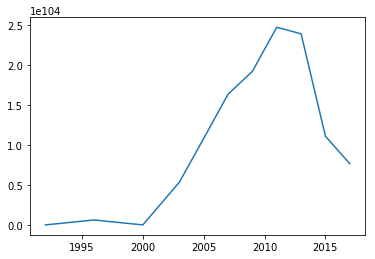

In [22]:
ts_M4['AVG_MATH_4_SCORE'] = np.exp(ts_M4['AVG_MATH_4_SCORE'])
plt.plot(ts_M4['YEAR'],ts_M4['AVG_MATH_4_SCORE'])

In [23]:
## ADF test
t=sm.tsa.stattools.adfuller(ts_M4['AVG_MATH_4_SCORE'], )
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
print(output)

                                value
Test Statistic Value               -0
p-value                      0.958532
Lags Used                           7
Number of Observations Used         3
Critical Value(1%)           -10.4172
Critical Value(5%)           -5.77838
Critical Value(10%)          -3.39168


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1181: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
